### <span style="color:red">Lorenzo Albano, 967738</span>

# <span style="color:red"> ESERCIZIO 1.2:</span> Distribuzioni uniforme, esponenziale e lorentziana nel generatore di numeri casuali

## <span style="color:blue"> GRAFICI A,B,C)</span> Verifica del Teorema del Limite Centrale
Si effettuano 4 set di $10.000$ medie su gruppi di $1$,$2$,$10$,$100$ numeri estratti con distribuzioni uniforme, esponenziale e lorentziana.
1. La distribuzione uniforme $p(x)=x$ ha $x\in [0;1]$
2. La distribuzione esponenziale $p(x) = \lambda \exp(-\lambda x)$ ha $\lambda=1$ e $x\in [0;+\infty]$ 
3. La distribuzione lorentziana $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ ha $\Gamma=1$, $\mu=0$ e $x\in [-\infty;+\infty]$. 

Le distribuzioni sono ottenute computazionalmente tramite il metodo di inversione della cumulativa.
Vengono riportati nei grafici i 10.000 valori medi ottenuti per i 4 set, per le tre distribuzioni.

Il Teorema del Limite Centrale afferma che, data una variabile aleatoria $X$ distribuita secondo una distribuzione qualunque con varianza finita, allora l'osservabile $Y_N = \frac{1}{N}\sum_i^N X_i$ tende ad una distribuzione Gaussiana intorno al valor medio di $X$ per $N\to +\infty$. Il teorema può essere quindi verificato nei casi di distribuzione uniforme ed esponenziale per $N=100$ (non per la lorentziana in quanto la sua varianza non è finita, ipotesi del teorema).

<IPython.core.display.Javascript object>


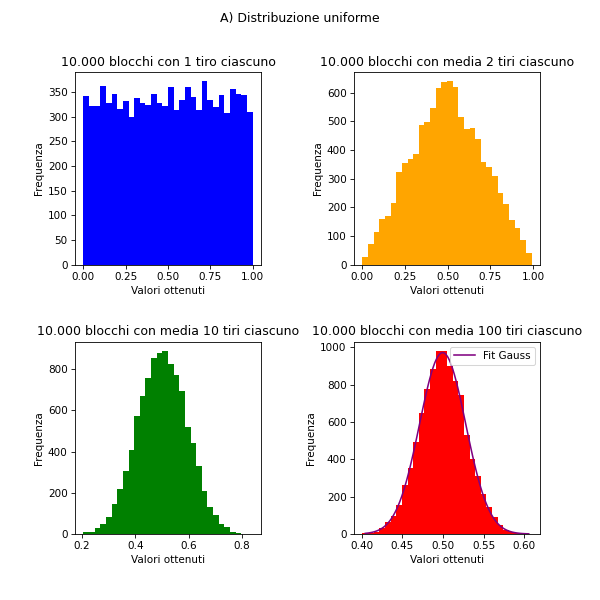

In [1]:
#così mi muovo nei grafici ed ho grafici interattivi
%matplotlib notebook 

import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit

# Dati per gli istogrammi
data1 = np.loadtxt('2.Uniforme_1.out')
data2 = np.loadtxt('2.Uniforme_2.out')
data3 = np.loadtxt('2.Uniforme_10.out')
data4 = np.loadtxt('2.Uniforme_100.out')
# Creazione dei subplot
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Creazione degli istogrammi
axs[0, 0].hist(data1, bins=30, color='blue')
axs[0, 1].hist(data2, bins=30, color='orange')
axs[1, 0].hist(data3, bins=30, color='green')
hist4, bin_edges4, _ = axs[1, 1].hist(data4, bins=30, color='red')

# Personalizzazione dei titoli degli assi e dei titoli dei subplot
axs[0, 0].set_title('10.000 blocchi con 1 tiro ciascuno')
axs[0, 0].set_xlabel('Valori ottenuti')
axs[0, 0].set_ylabel('Frequenza')
axs[0, 1].set_title('10.000 blocchi con media 2 tiri ciascuno')
axs[0, 1].set_xlabel('Valori ottenuti')
axs[0, 1].set_ylabel('Frequenza')
axs[1, 0].set_title('10.000 blocchi con media 10 tiri ciascuno')
axs[1, 0].set_xlabel('Valori ottenuti')
axs[1, 0].set_ylabel('Frequenza')
axs[1, 1].set_title('10.000 blocchi con media 100 tiri ciascuno')
axs[1, 1].set_xlabel('Valori ottenuti')
axs[1, 1].set_ylabel('Frequenza')

# Calcola i bin centers per il fit gaussiano
bin_centers4 = 0.5 * (bin_edges4[1:] + bin_edges4[:-1])

# Definizione gaussiana
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Fai il fit dei dati all'interno dell'istogramma per N=100 con una funzione gaussiana
p0 = [np.mean(data4), np.std(data4), np.max(hist4)]  # Parametri iniziali per il fit
params, cov = curve_fit(gaussian, bin_centers4, hist4, p0=p0)

# Crea un array di punti per la curva del fit
x_fit = np.linspace(bin_centers4[0], bin_centers4[-1], 100)

# Calcola i valori della curva del fit
y_fit = gaussian(x_fit, *params)

# Crea il grafico del fit gaussiano
axs[1, 1].plot(x_fit, y_fit, color='purple', linewidth=1.5, label='Fit Gauss')

# Aggiunge la legenda al grafico
axs[1, 1].legend(loc='upper right')

# Distanziamento
plt.subplots_adjust(wspace=0.5, hspace=0.4)

# Aggiungi un titolo generale per l'intero plot
plt.suptitle('A) Distribuzione uniforme')

# Visualizzazione degli istogrammi
plt.show()

<IPython.core.display.Javascript object>


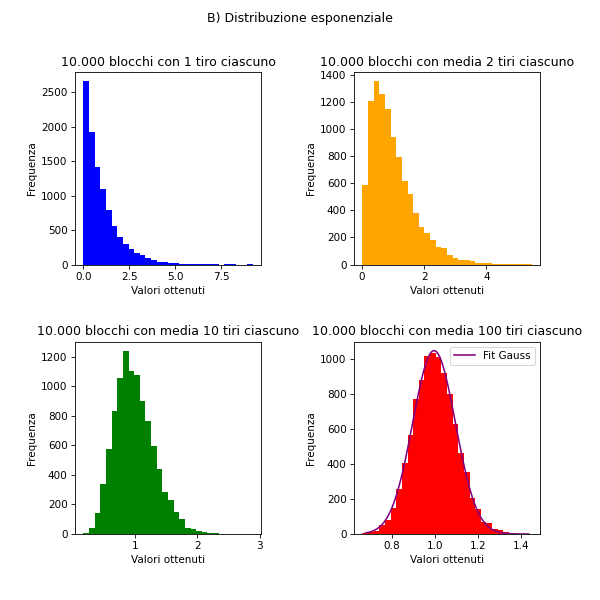

In [2]:
#così mi muovo nei grafici ed ho grafici interattivi
%matplotlib notebook 

# Dati per gli istogrammi
data1 = np.loadtxt('2.Exponential_1.out')
data2 = np.loadtxt('2.Exponential_2.out')
data3 = np.loadtxt('2.Exponential_10.out')
data4 = np.loadtxt('2.Exponential_100.out')
# Creazione dei subplot
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Creazione degli istogrammi
axs[0, 0].hist(data1, bins=30, color='blue')
axs[0, 1].hist(data2, bins=30, color='orange')
axs[1, 0].hist(data3, bins=30, color='green')
hist4, bin_edges4, _ = axs[1, 1].hist(data4, bins=30, color='red')

# Personalizzazione dei titoli degli assi e dei titoli dei subplot
axs[0, 0].set_title('10.000 blocchi con 1 tiro ciascuno')
axs[0, 0].set_xlabel('Valori ottenuti')
axs[0, 0].set_ylabel('Frequenza')
axs[0, 1].set_title('10.000 blocchi con media 2 tiri ciascuno')
axs[0, 1].set_xlabel('Valori ottenuti')
axs[0, 1].set_ylabel('Frequenza')
axs[1, 0].set_title('10.000 blocchi con media 10 tiri ciascuno')
axs[1, 0].set_xlabel('Valori ottenuti')
axs[1, 0].set_ylabel('Frequenza')
axs[1, 1].set_title('10.000 blocchi con media 100 tiri ciascuno')
axs[1, 1].set_xlabel('Valori ottenuti')
axs[1, 1].set_ylabel('Frequenza')

# Calcola i bin centers per il fit gaussiano
bin_centers4 = 0.5 * (bin_edges4[1:] + bin_edges4[:-1])

# Definizione gaussiana
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Fai il fit dei dati all'interno dell'istogramma per N=100 con una funzione gaussiana
p0 = [np.mean(data4), np.std(data4), np.max(hist4)]  # Parametri iniziali per il fit
params, cov = curve_fit(gaussian, bin_centers4, hist4, p0=p0)

# Crea un array di punti per la curva del fit
x_fit = np.linspace(bin_centers4[0], bin_centers4[-1], 100)

# Calcola i valori della curva del fit
y_fit = gaussian(x_fit, *params)

# Crea il grafico del fit gaussiano
axs[1, 1].plot(x_fit, y_fit, color='purple', linewidth=1.5, label='Fit Gauss')

# Aggiunge la legenda al grafico
axs[1, 1].legend(loc='upper right')

#distanziamento
plt.subplots_adjust(wspace=0.5, hspace=0.4)


# Aggiungi un titolo generale per l'intero plot
plt.suptitle('B) Distribuzione esponenziale')

# Visualizzazione degli istogrammi
plt.show()

<IPython.core.display.Javascript object>


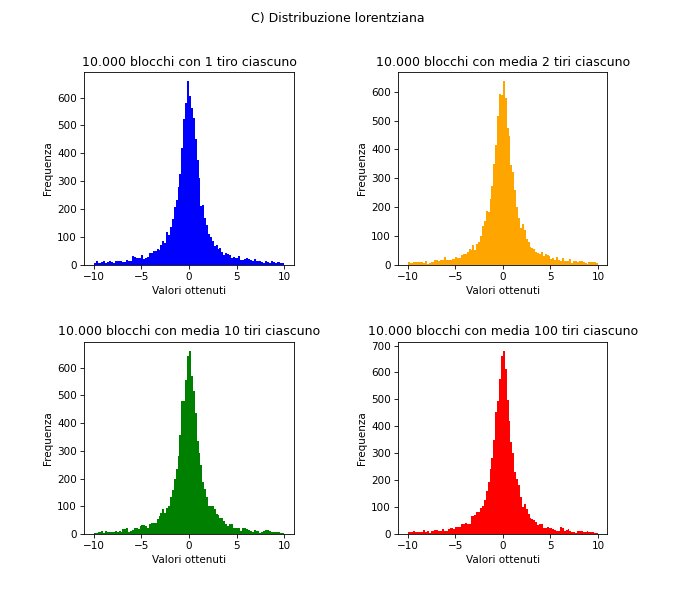

In [3]:
#così mi muovo nei grafici ed ho grafici interattivi
%matplotlib notebook 

import matplotlib.pyplot as plt
import numpy as np

# Dati per gli istogrammi
data1 = np.loadtxt('2.Lorentziana_1.out')
data2 = np.loadtxt('2.Lorentziana_2.out')
data3 = np.loadtxt('2.Lorentziana_10.out')
data4 = np.loadtxt('2.Lorentziana_100.out')

# Creazione dei subplot
fig, axs = plt.subplots(2, 2, figsize=(9, 8))

# Creazione degli istogrammi
axs[0, 0].hist(data1, bins=100, color='blue', range=(-10,10))
axs[0, 1].hist(data2, bins=100, color='orange', range=(-10,10))
axs[1, 0].hist(data3, bins=100, color='green', range=(-10,10))
axs[1, 1].hist(data4, bins=100, color='red', range=(-10,10))

# Personalizzazione dei titoli degli assi e dei titoli dei subplot
axs[0, 0].set_title('10.000 blocchi con 1 tiro ciascuno')
axs[0, 0].set_xlabel('Valori ottenuti')
axs[0, 0].set_ylabel('Frequenza')
axs[0, 1].set_title('10.000 blocchi con media 2 tiri ciascuno')
axs[0, 1].set_xlabel('Valori ottenuti')
axs[0, 1].set_ylabel('Frequenza')
axs[1, 0].set_title('10.000 blocchi con media 10 tiri ciascuno')
axs[1, 0].set_xlabel('Valori ottenuti')
axs[1, 0].set_ylabel('Frequenza')
axs[1, 1].set_title('10.000 blocchi con media 100 tiri ciascuno')
axs[1, 1].set_xlabel('Valori ottenuti')
axs[1, 1].set_ylabel('Frequenza')

#distanziamento
plt.subplots_adjust(wspace=0.5, hspace=0.4)

# Aggiungi un titolo generale per l'intero plot
plt.suptitle('C) Distribuzione lorentziana')

# Visualizzazione degli istogrammi
plt.show()